In [1]:
%matplotlib inline
from __future__ import division
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import common
import notebook_helpers

FS = (10, 7)

om = notebook_helpers.get_frame()
lyrs = notebook_helpers.get_frame(having_lyrics=True)

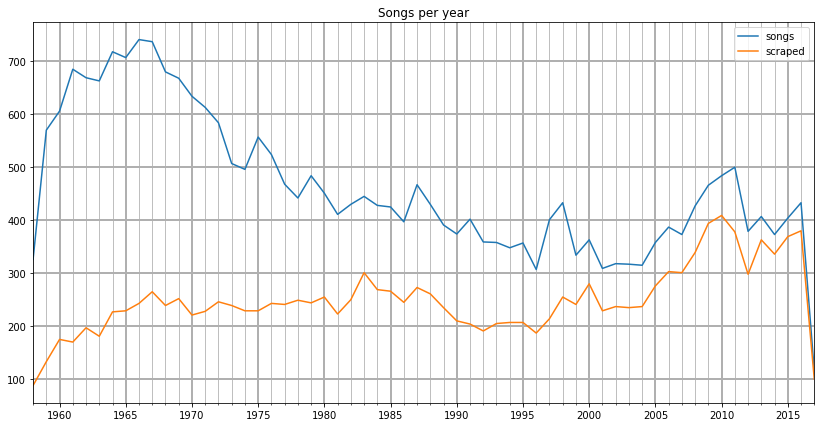

In [2]:
songs_per_year = om.groupby('year').size()
scraped_per_year = lyrs.groupby('year').size()
fig, ax = plt.subplots(figsize=(14, 7))
yrs = songs_per_year.index
ax.plot(songs_per_year.index, songs_per_year.values, label='songs')
ax.plot(scraped_per_year.index, scraped_per_year.values, label='scraped')
ax.set_xticks([yr for yr in songs_per_year.index if yr%5 == 0], minor=0);
ax.set_xticks(songs_per_year.index, minor=1);
ax.grid(which='minor');
ax.grid(which='major', lw=2);
ax.set_xlim(yrs.min(), yrs.max());
ax.set_title('Songs per year')
ax.legend();

In [3]:
ihit = lyrs['peak'] <= 10
print "{:,} out of {:,} scraped songs cracked the top 10".format(ihit.sum(), len(lyrs))
lyrs['peak'].describe()

3,526 out of 14,871 scraped songs cracked the top 10


count    14871.000000
mean        39.476027
std         29.906871
min          1.000000
25%         11.000000
50%         35.000000
75%         64.000000
max        100.000000
Name: peak, dtype: float64

In [4]:
lyrs['ratio'].describe()

count    14871.000000
mean         2.953096
std          0.858013
min          1.250000
25%          2.423757
50%          2.836055
75%          3.318076
max         47.454545
Name: ratio, dtype: float64

In [5]:
lyrs['raw_ratio'].describe()

count    14871.000000
mean         2.826245
std          0.774359
min          0.571429
25%          2.326776
50%          2.722317
75%          3.181879
max         35.270270
Name: raw_ratio, dtype: float64

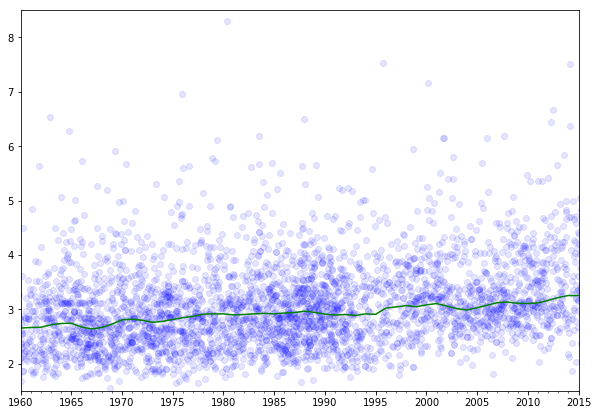

In [6]:
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

window_size = 3
ihit = lyrs['peak'] <= 10
fig, ax = plt.subplots(figsize=FS)
ax.scatter(lyrs[ihit]['yearf'], lyrs[ihit]['ratio'], 
           label='top10', color='blue', alpha=.1,
)
plot_nonhits = 0
if plot_nonhits:
    ax.scatter(lyrs[~ihit]['yearf'], lyrs[~ihit]['ratio'], 
               label='other', color='orange', alpha=.1,
    )
#ax = lyrs.plot.scatter(figsize=FS, x='yearf', y='ratio', alpha=.1)
ax.set_ylim(1.5, 8.5);
ax.set_xlim(yrs.min(), yrs.max());
ax.set_xticks([yr for yr in songs_per_year.index if yr%5 == 0], minor=0);
ax.set_xticks(songs_per_year.index, minor=1);
#ax.set_yscale('log');
ax.set_xlim(1960, 2015)

mean_per_year = lyrs.groupby('year')['ratio'].mean()
rolling = 1
if rolling:
    y = movingaverage(mean_per_year.values, window_size)
else:
    y = mean_per_year.values
ax.plot(mean_per_year.index, y, color='g');
#ax.grid(which='minor');
#ax.grid(which='major');

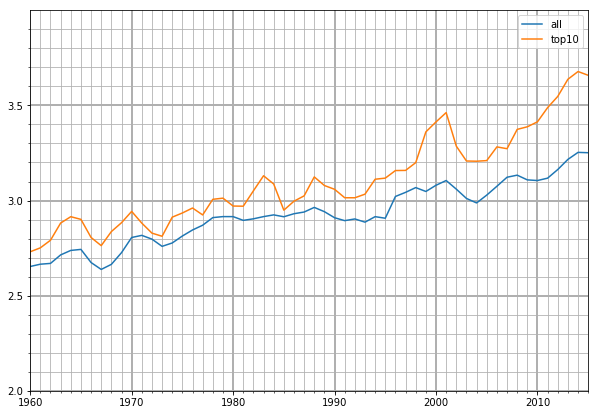

In [11]:
window_size = 3
fig, ax = plt.subplots(figsize=FS)
#ax = lyrs.groupby('year')['ratio'].mean().plot(figsize=FS)
mean_per_year = lyrs.groupby('year')['ratio'].mean()
rolling = 1
plot_hits = 1
if rolling:
    y = movingaverage(mean_per_year.values, window_size)
else:
    y = mean_per_year.values
ax.plot(mean_per_year.index, y, label='all')
if plot_hits:
    mean_per_year = lyrs[ihit].groupby('year')['ratio'].mean()
    if rolling:
        y = movingaverage(mean_per_year.values, window_size)
    else:
        y = mean_per_year.values
    ax.plot(mean_per_year.index, y, label='top10')
    ax.legend()
    
ax.set_xlim(yrs.min(), yrs.max());
every_nth_year = 10
ax.set_xticks([yr for yr in songs_per_year.index if yr%every_nth_year == 0], minor=0);
ax.set_xticks(songs_per_year.index, minor=1);
ax.set_xlim(1960, 2015)

ymin = 2
ymax = 4
logy = 0
if logy:
    ax.set_yscale('log')
    ax.set_ylim(2, 4);
else:
    ax.set_ylim(ymin, ymax);
    ax.set_yticks(np.arange(ymin, ymax, .5), minor=0)
    ax.set_yticks(np.arange(ymin, ymax, .1), minor=1)

ax.grid(which='minor');
ax.grid(which='major', lw=2);

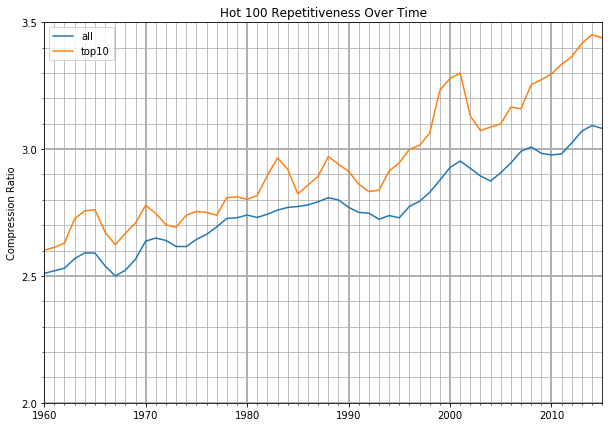

In [21]:
# Same as above, but use harmonic mean
from scipy.stats import hmean
window_size = 3
fig, ax = plt.subplots(figsize=FS)
#ax = lyrs.groupby('year')['ratio'].mean().plot(figsize=FS)
mean_per_year = lyrs.groupby('year')['ratio'].apply(hmean)
rolling = 1
plot_hits = 1
if rolling:
    y = movingaverage(mean_per_year.values, window_size)
else:
    y = mean_per_year.values
ax.plot(mean_per_year.index, y, label='all')
if plot_hits:
    mean_per_year = lyrs[ihit].groupby('year')['ratio'].apply(hmean)
    if rolling:
        y = movingaverage(mean_per_year.values, window_size)
    else:
        y = mean_per_year.values
    ax.plot(mean_per_year.index, y, label='top10')
    ax.legend()
    
ax.set_xlim(yrs.min(), yrs.max());
every_nth_year = 10
ax.set_xticks([yr for yr in songs_per_year.index if yr%every_nth_year == 0], minor=0);
ax.set_xticks(songs_per_year.index, minor=1);
ax.set_xlim(1960, 2015)

ymin = 2
ymax = 3.5
logy = 0
if logy:
    ax.set_yscale('log')
    ax.set_ylim(2, 4);
else:
    ax.set_ylim(ymin, ymax);
    ax.set_yticks(np.arange(ymin, ymax+.01, .5), minor=0)
    ax.set_yticks(np.arange(ymin, ymax, .1), minor=1)

ax.grid(which='minor');
ax.grid(which='major', lw=2);
ax.set_title('Hot 100 Repetitiveness Over Time');
ax.set_ylabel('Compression Ratio');

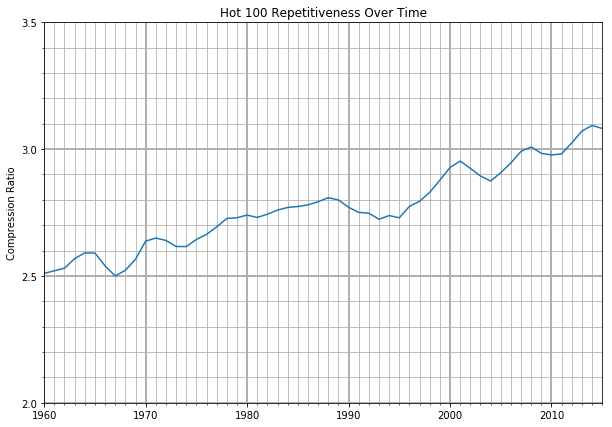

In [22]:
from scipy.stats import hmean
window_size = 3
logy = 0
rolling = 1
def plot_rep_over_time(plot_hits=False):
    fig, ax = plt.subplots(figsize=FS)
    mean_per_year = lyrs.groupby('year')['ratio'].apply(hmean)
    if rolling:
        y = movingaverage(mean_per_year.values, window_size)
    else:
        y = mean_per_year.values
    ax.plot(mean_per_year.index, y, label='all')
    if plot_hits:
        mean_per_year = lyrs[ihit].groupby('year')['ratio'].apply(hmean)
        if rolling:
            y = movingaverage(mean_per_year.values, window_size)
        else:
            y = mean_per_year.values
        ax.plot(mean_per_year.index, y, label='top10')
        ax.legend()

    ax.set_xlim(yrs.min(), yrs.max());
    every_nth_year = 10
    ax.set_xticks([yr for yr in songs_per_year.index if yr%every_nth_year == 0], minor=0);
    ax.set_xticks(songs_per_year.index, minor=1);
    ax.set_xlim(1960, 2015)
    ymin = 2
    ymax = 3.5
    if logy:
        ax.set_yscale('log')
        ax.set_ylim(2, 4);
    else:
        ax.set_ylim(ymin, ymax);
        ax.set_yticks(np.arange(ymin, ymax+.01, .5), minor=0)
        ax.set_yticks(np.arange(ymin, ymax, .1), minor=1)

    ax.grid(which='minor');
    ax.grid(which='major', lw=2);
    ax.set_title('Hot 100 Repetitiveness Over Time');
    ax.set_ylabel('Compression Ratio');
    return ax

plot_rep_over_time()

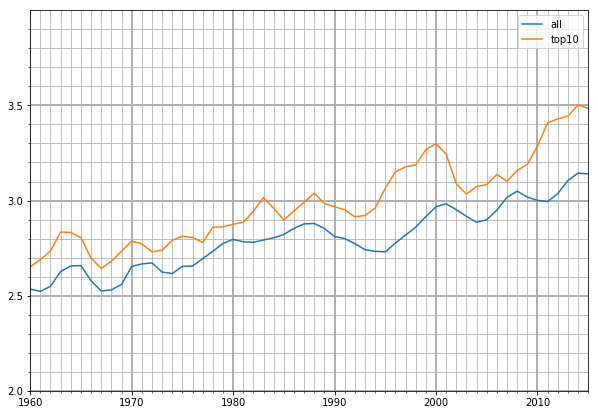

In [8]:
# Same as above but use median
window_size = 3
fig, ax = plt.subplots(figsize=FS)
#ax = lyrs.groupby('year')['ratio'].mean().plot(figsize=FS)
mean_per_year = lyrs.groupby('year')['ratio'].median()
rolling = 1
plot_hits = 1
if rolling:
    y = movingaverage(mean_per_year.values, window_size)
else:
    y = mean_per_year.values
ax.plot(mean_per_year.index, y, label='all')
if plot_hits:
    mean_per_year = lyrs[ihit].groupby('year')['ratio'].median()
    if rolling:
        y = movingaverage(mean_per_year.values, window_size)
    else:
        y = mean_per_year.values
    ax.plot(mean_per_year.index, y, label='top10')
    ax.legend()
    
ax.set_xlim(yrs.min(), yrs.max());
every_nth_year = 10
ax.set_xticks([yr for yr in songs_per_year.index if yr%every_nth_year == 0], minor=0);
ax.set_xticks(songs_per_year.index, minor=1);
ax.set_xlim(1960, 2015)

ymin = 2
ymax = 4
logy = 0
if logy:
    ax.set_yscale('log')
    ax.set_ylim(2, 4);
else:
    ax.set_ylim(ymin, ymax);
    ax.set_yticks(np.arange(ymin, ymax, .5), minor=0)
    ax.set_yticks(np.arange(ymin, ymax, .1), minor=1)

ax.grid(which='minor');
ax.grid(which='major', lw=2);

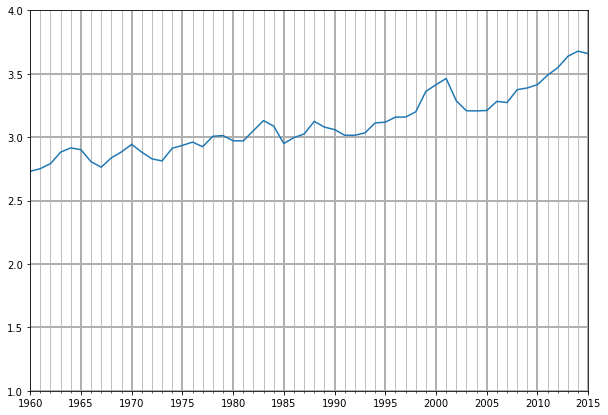

In [9]:
ihit = lyrs['peak'] <= 10
window_size = 3
fig, ax = plt.subplots(figsize=FS)
mean_per_year = lyrs[ihit].groupby('year')['ratio'].mean()
rolling = 1
if rolling:
    y = movingaverage(mean_per_year.values, window_size)
else:
    y = mean_per_year.values
ax.plot(mean_per_year.index, y);
ax.set_ylim(1, 4);
ax.set_xlim(yrs.min(), yrs.max());
ax.set_xticks([yr for yr in songs_per_year.index if yr%5 == 0], minor=0);
ax.set_xticks(songs_per_year.index, minor=1);
ax.set_xlim(1960, 2015)
ax.grid(which='minor');
ax.grid(which='major', lw=2);

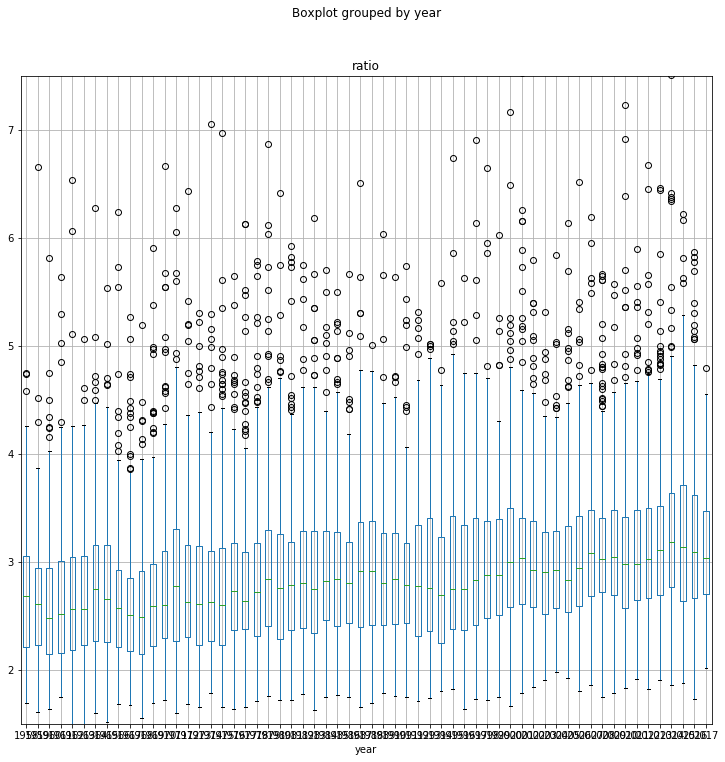

In [10]:
ax = lyrs.boxplot(by='year', column='ratio', figsize=(12, 12));
ax.set_ylim(1.5, 7.5);